/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

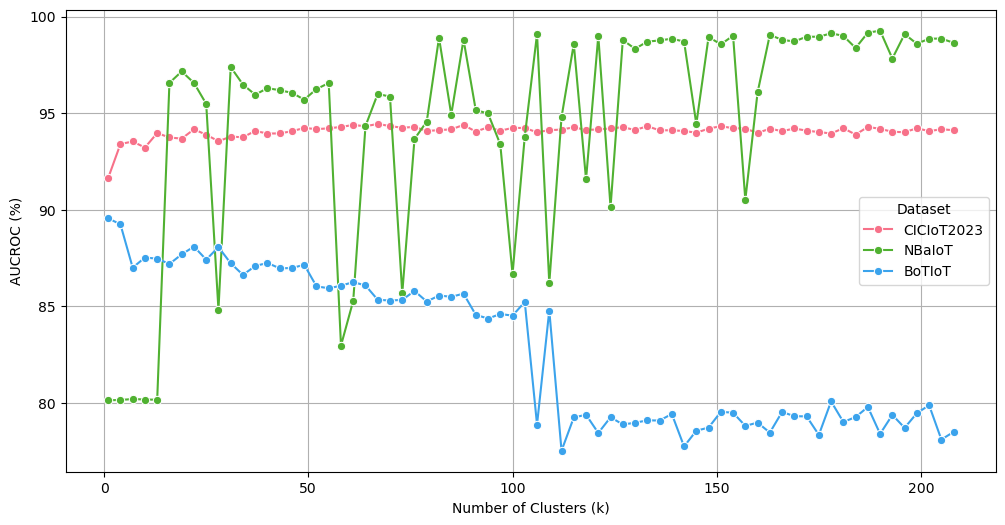

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# List of dataset paths and their labels
datasets = [
    ("final_data_CICIoT2023.csv_100k_oldlearn0.csv", "CICIoT2023"),
    ("final_data_N_BaIoT.csv_100k_oldlearn0.csv", "NBaIoT"),
    ("final_data_BoTIoT.csv_100k_oldlearn0.csv", "BoTIoT")
]

# Define a color palette for three distinct colors
colors = sns.color_palette("husl", 3)  # Generates 3 distinct colors

# Scaler to plot
scaler = "MinMaxScaler"

# Loop through datasets and plot
for i, (file_path, dataset_name) in enumerate(datasets):
    # Read the dataset
    df = pd.read_csv(file_path)

    if dataset_name == "BoTIoT":
        scaler = "Normalizer"
    
    # Filter for the specified scaler and noise percentage
    subset = df[(df["scaler"] == scaler) & (df["noise_percentage"] == 0)]
    
    # Plot AUCROC vs nCluster with a unique color and label
    sns.lineplot(
        x="nCluster", 
        y="AUCROC", 
        data=subset, 
        marker="o", 
        label=dataset_name, 
        color=colors[i]
    )

# Customize the plot
plt.xlabel("Number of Clusters (k)")
plt.ylabel("AUCROC (%)")
plt.legend(title="Dataset")
plt.grid(True)

# Save the plot as an image file
plt.savefig("aucroc_vs_ncluster_plot.png", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()